In [1]:
import sys
from diffusers import KandinskyV22Pipeline, KandinskyV22PriorPipeline
import torch
import PIL
import torch
from diffusers.utils import load_image
from torchvision import transforms
from transformers import CLIPVisionModelWithProjection
from diffusers.models import UNet2DConditionModel
import numpy as np

DEVICE = torch.device('cuda:0')

ModuleNotFoundError: No module named 'diffusers'

In [ ]:
image_encoder = CLIPVisionModelWithProjection.from_pretrained(
    'kandinsky-community/kandinsky-2-2-prior',
    subfolder='image_encoder'
).half().to(DEVICE)

In [ ]:
unet = UNet2DConditionModel.from_pretrained(
    'kandinsky-community/kandinsky-2-2-decoder',
    subfolder='unet'
).half().to(DEVICE)

In [ ]:
prior = KandinskyV22PriorPipeline.from_pretrained(
    'kandinsky-community/kandinsky-2-2-prior',
    image_encoder=image_encoder,
    torch_dtype=torch.float16
).to(DEVICE)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

Loading pipeline components...: 100%|██████████| 6/6 [00:14<00:00,  2.47s/it]


In [ ]:
decoder = KandinskyV22Pipeline.from_pretrained(
    'kandinsky-community/kandinsky-2-2-decoder',
    unet=unet,
    torch_dtype=torch.float16
).to(DEVICE)

Loading pipeline components...: 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]


In [7]:
torch.manual_seed(42)

negative_prior_prompt ='lowres, text, error, cropped, worst quality, low quality, jpeg artifacts, ugly, duplicate, morbid, mutilated, out of frame, extra fingers, mutated hands, poorly drawn hands, poorly drawn face, mutation, deformed, blurry, dehydrated, bad anatomy, bad proportions, extra limbs, cloned face, disfigured, gross proportions, malformed limbs, missing arms, missing legs, extra arms, extra legs, fused fingers, too many fingers, long neck, username, watermark, signature'
negative_prior_prompt = 'low quality, bad quality'

img_emb = prior(
    prompt='big bag with entering room with clown with me, interstring, atmospheric, many words, many cocks, many rocks, many boobs, many people, many kicks, disney, pixar, ea sports, dotnet, c++, clownish, british, european union, programmer, complicated, overall, international, music, pitbull, dogs, cats, rats, racoons, nature, family, fast and furious like, century, film, am i too clownish right now, is it gonna end sometime, what the hell man stop please already you clown stop stop',
    num_inference_steps=250,
    num_images_per_prompt=1
)

negative_emb = prior(
    prompt=negative_prior_prompt,
    num_inference_steps=250,
    num_images_per_prompt=1
)

images = decoder(
    image_embeds=img_emb.image_embeds,
    negative_image_embeds=negative_emb.image_embeds,
    num_inference_steps=250,
    guidance_scale=4.0,
    height=380,
    width=720)

100%|██████████| 250/250 [00:18<00:00, 13.30it/s]


In [8]:
type(images.images[0])

PIL.Image.Image

In [10]:
PIL.Image.Image

PIL.Image.Image

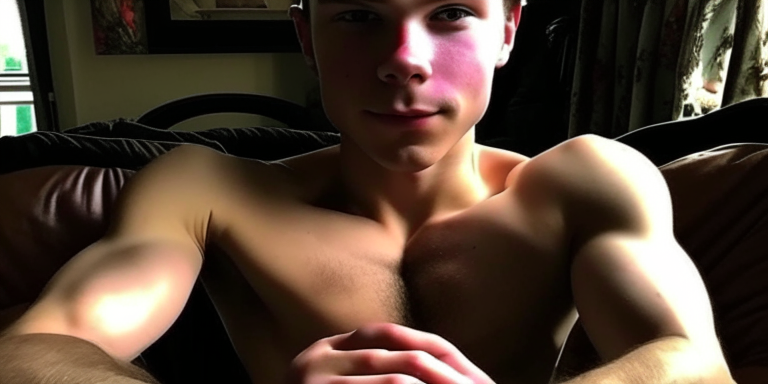

In [9]:
images.images[0]